# **Lab 5**: Naive Bayes Classification and Feature Selection

In this lab you will practice machine learning (surprise!), specifically experimenting with Naive Bayes Classifiers, and performing feature selection.

You will also continue to practice programming in python, which you should now be quite comfortable doing.

To pass this lab you must complete all parts marked with a "*". You can do more parts, of course, because in the end that will help you on your project!

*HINT: See code that we have presented in class.*

This lab is based on this dataset: https://archive.ics.uci.edu/ml/datasets/adult. The following code loads in the training and testing data and appropriately labels the columns.


In [29]:
columnNames = ['age','workclass','fnlwgt','education','education_num',
                                'marital-status','occupation','relationship',
                                'race','sex','capital-gain','capital-loss',
                                'hours-per-week','native-country','class']

import pandas as pd
data_train = pd.read_csv('adult.data',sep=',',header=None,names=columnNames)
data_train = data_train.drop('fnlwgt',axis=1)
print(data_train)


       age          workclass    education  education_num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaner

# 1.1* 
Who collected this dataset, when and why? Where does the data come from?

**Answer**: The dataset was extracted from the 1994 Census bureau database by Barry Becker. The dataset was donated on April 30, 1996.

The purpose of collecting this dataset was to predict whether a person’s income exceeds $50K per year based on census data.

The data comes from the 1994 Census database.


# 1.2*

What does the data in columns 4, 7 and 8 refer to? For each, what are the possible values?

**Answer**: Column 4 - Education: This column represents the highest level of education achieved by an individual. The possible values are: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

Column 7 - Occupation: This column represents the individual’s occupation. The possible values are: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Column 8 - Relationship: This column represents the individual’s relationship status. The possible values are: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

# 1.3*
For the training data (adult.data), create three histograms showing the proportion of records in each of the possible categories for education, occupation and relationship.

Most rare education:  Preschool - 51 records
Least rare education:  HS-grad - 10501 records
Most rare occupation:  Armed-Forces - 9 records
Least rare occupation:  Prof-specialty - 4140 records
Most rare relationship:  Other-relative - 981 records
Least rare relationship:  Husband - 13193 records


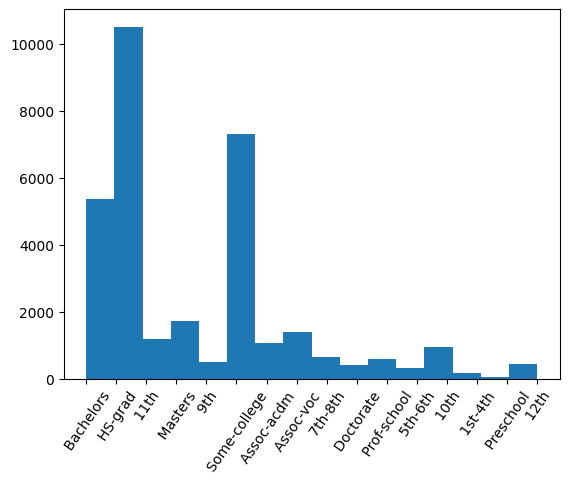

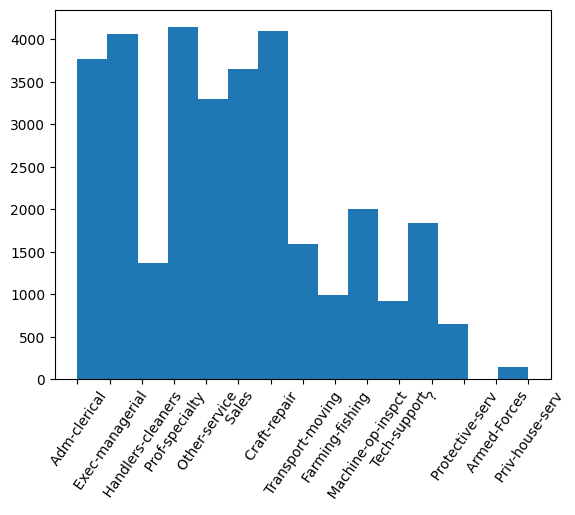

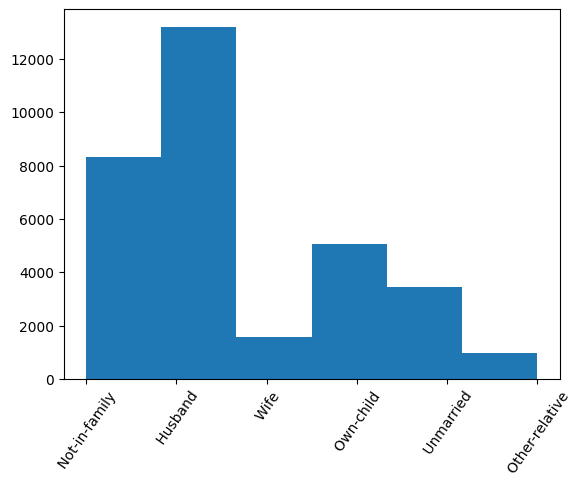

In [56]:
# add your code below

import matplotlib.pyplot as plt
import numpy as np

# print((data_train['relationship'].shape))

""" PROBLEM: 'occupation' ger '?', som syns i histogrammet """
# Bins är också lite fucked

for category in ['education', 'occupation', 'relationship']:
    plt.figure()
    # print(np.unique(data_train[category]))
    plt.hist(data_train[category], bins=len(np.unique(data_train[category]))); plt.xticks(rotation=55)
    plt.show

    value_counts = data_train[category].value_counts()

    most_rare_value = value_counts.idxmin()
    most_rare_count = value_counts.min()

    least_rare_value = value_counts.idxmax()
    least_rare_count = value_counts.max()

    print(f"Most rare {category}: {most_rare_value} - {most_rare_count} records")
    print(f"Least rare {category}: {least_rare_value} - {least_rare_count} records")

# 1.4*
From your histograms, what is the most rare education level, the most rare occupation, and the least rare relationship? How many records have each of these values?

**Answer**:
Most rare education:  Preschool - 51 records

Most rare occupation:  Armed-Forces - 9 records

Least rare relationship:  Husband - 13193 records


# 1.5* 
Train and test a Naive Bayes classifier on this dataset to predict whether a person with 14 particular characteristics makes more than $50,000/yr. Use a 70/30 random split of the *training data* to estimate the accuracy of the model. Use a Categorical model for the categorical features, e.g., 'workclass' and 'education', and a Guassian model for the numerical features, e.g., 'age' and 'hours-per-week'. Add the predicted log probabilities of these models and make a decision based on which class has the largest log probability.

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import LabelEncoder

columns_categorical = ['workclass','education','marital-status','occupation',
                       'relationship','race','sex','native-country']
columns_numerical = ['age','education_num','capital-gain','capital-loss',
                        'hours-per-week']

# we need to first encode the categorical columns
data_train_encoded = pd.DataFrame()
for col in columns_categorical:
  LE = LabelEncoder()
  dt = LE.fit_transform(data_train[col])
  data_train_encoded[col] = dt

# combine with the numerical columns
for col in columns_numerical:
  data_train_encoded[col] = data_train[col]

# add in the encoded class column
LE = LabelEncoder()
data_train_encoded['class'] = LE.fit_transform(data_train['class'])

# add your code below


tot_log_prob = None

#extreme genius:
for column_type, bayes_type in [(columns_categorical, CategoricalNB), (columns_numerical, GaussianNB)]:

  """random_state i train_test_split ?"""
  X_train, X_test, y_train, y_test = train_test_split(data_train_encoded[column_type], data_train_encoded['class'], train_size=0.7)

  # From Lecture11_NB 
  # –––
  NaiveBayesModel = bayes_type()
  NaiveBayesModel.fit(X_train,y_train)

  y_pred = NaiveBayesModel.predict(X_test)

  # Comparing the predicted and actual values to calculate the accuracy of the model for each feature type
  print(f'{column_type}: {sum(y_test==y_pred)/len(y_pred)}')

  # –––

  # X_test? La den bara för den används för y_pred ^
  log_prob = NaiveBayesModel.predict_log_proba(X_test)

  # print(log_prob)
  if tot_log_prob is None:
    tot_log_prob = log_prob
  else:
    tot_log_prob += log_prob

# axis=1 summerar kolumner (?)
largest_log_prob = np.argmax(tot_log_prob, axis=1)


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']: 0.7949636605589109
['age', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']: 0.7949636605589109


# 1.6* 
How does the performance of your naive Bayes classifier compare with always choosing "<=50K"? How does it compare with the highest performing algorithm described in the dataset information sheet?

**Answer**: 

The highest performing algorithm described in the dataset info-sheet, Xgboost Classification, has an accuracy of between 86,702 and 87,734. This is an increase of about 

In [65]:
"""How does the performance of your naive Bayes classifier compare with always choosing "<=50K"?"""

y_pred_always_less_than_50k = np.zeros(y_test.shape)

accuracy_always_less_than_50k = sum(y_test == y_pred_always_less_than_50k) / len(y_pred_always_less_than_50k)

print(f'Accuracy of always choosing <=50k: {accuracy_always_less_than_50k}')


Accuracy of always choosing <=50k: 0.7524823421025694


# 1.7*
Apply feature selection (use SelectKBest with the chi2 option) to determine which are the best five features to use for predicting whether someone makes more than $50K each year. What are those features? Use the 70/30 random split of the *training data* you created in 1.6 to estimate the accuracy of the model.  What is the accuracy on the 30% you held out?

**Answer**: 


In [32]:
# add your code below


# 1.8*
For each feature selected, describe how it might make sense to be a good predictor of the class.

**Answer**:


# 1.9*

Now load in the test data, i.e., "adult.test". Train a Naive Bayes classifer on all the training data with all the features (except for 'fnlwgt'), and another Naive Bayes classifier on the features you selected in 1.7. Make sure you keep the categorical and numerical models separate, as before. Compute their accuracies.

In [33]:
# read in the test data
downloaded = drive.CreateFile({'id':"1DCkICLJ2zOda4YzRIs1UN6w30UZZhFuy"})   # replace the id with id of file you want to access
downloaded.GetContentFile('adult.test')        # replace the file name with your file
data_test = pd.read_csv('adult.test',sep=',',header=None,names=columnNames)
data_test = data_test.drop('fnlwgt',axis=1)

columns_categorical = ['workclass','education','marital-status','occupation',
                       'relationship','race','sex','native-country']
columns_numerical = ['age','education_num','capital-gain','capital-loss',
                        'hours-per-week']

# we need to first encode the categorical columns
data_train_encoded = pd.DataFrame()
data_test_encoded = pd.DataFrame()
for col in columns_categorical:
  LE = LabelEncoder()
  dt = LE.fit_transform(data_train[col])
  data_train_encoded[col] = dt
  dt = LE.transform(data_test[col])
  data_test_encoded[col] = dt

# combine with the numerical columns
for col in columns_numerical:
  data_train_encoded[col] = data_train[col]
  data_test_encoded[col] = data_test[col]

# add in the encoded class column
LE = LabelEncoder()
data_train_encoded['class'] = LE.fit_transform(data_train['class'])
data_test_encoded['class'] = LE.fit_transform(data_test['class'])

# add your code below


NameError: name 'drive' is not defined

# 1.10*

Plot the confusion tables for both.

In [ ]:
# Add your code below

# 1.11*

From your tables in 1.10, which class shows the largest confusion?

**Answer**: 